# Predicting Industrial Machine Downtime: Level 2

## 📖 Background
You work for a manufacturer of high-precision metal components used in aerospace, automotives, and medical device applications. Your company operates three different machines on its shop floor that produce different sized components, so minimizing the downtime of these machines is vital for meeting production deadlines.

Your team wants to use a data-driven approach to predicting machine downtime, so proactive maintenance can be planned rather than being reactive to machine failure. To support this, your company has been collecting operational data for over a year and whether each machine was down at those times.

In this second level, you're going to visualize and examine the data in more detail. This level is aimed towards intermediate learners. If you want to challenge yourself a bit more, check out level three!

## 💾 The data

The company has stored the machine operating data in a single table, available in `'data/machine_downtime.csv'`.

#### Each row in the table represents the operational data for a single machine on a given day:
- `"Date"` - the date the reading was taken on.
- `"Machine_ID"` - the unique identifier of the machine being read.
- `"Assembly_Line_No"` - the unique identifier of the assembly line the machine is located on.
- `"Hydraulic_Pressure(bar)"`, `"Coolant_Pressure(bar)"`, and `"Air_System_Pressure(bar)"` - pressure measurements at different points in the machine.
- `"Coolant_Temperature"`, `"Hydraulic_Oil_Temperature"`, and `"Spindle_Bearing_Temperature"` - temperature measurements (in Celsius) at different points in the machine.
- `"Spindle_Vibration"`, `"Tool_Vibration"`, and `"Spindle_Speed(RPM)"` - vibration (measured in micrometers) and rotational speed measurements for the spindle and tool.
- `"Voltage(volts)"` - the voltage supplied to the machine.
- `"Torque(Nm)"` - the torque being generated by the machine.
- `"Cutting(KN)"` - the cutting force of the tool.
- `"Downtime"` - an indicator of whether the machine was down or not on the given day.

## 1. Introduction

In the competitive landscape of high-precision manufacturing, ensuring the reliability of production machinery is paramount. Machine downtime can lead to significant delays, increased costs, and compromised product quality. This report leverages over a year of operational data from three different machines to analyze and predict downtime occurrences. By identifying patterns and key operational indicators associated with machine failures, the company can implement proactive maintenance measures to enhance operational efficiency and reduce unplanned downtimes.

## 2. Data Preparation and Cleaning

### 2.1. Data Loading and Initial Inspection

We begin by loading the dataset and performing an initial inspection to understand its structure and identify any immediate data quality issues.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
downtime = pd.read_csv('data/machine_downtime.csv')

# Display the first few rows to verify successful loading
print(downtime.head())

# Check for missing values to ensure data integrity
print(downtime.isnull().sum())

         Date            Machine_ID  ... Cutting(kN)         Downtime
0  31-12-2021  Makino-L1-Unit1-2013  ...        3.58  Machine_Failure
1  31-12-2021  Makino-L1-Unit1-2013  ...        2.68  Machine_Failure
2  31-12-2021  Makino-L3-Unit1-2015  ...        3.55  Machine_Failure
3  31-05-2022  Makino-L2-Unit1-2015  ...        3.55  Machine_Failure
4  31-03-2022  Makino-L1-Unit1-2013  ...        3.55  Machine_Failure

[5 rows x 16 columns]
Date                            0
Machine_ID                      0
Assembly_Line_No                0
Hydraulic_Pressure(bar)        10
Coolant_Pressure(bar)          19
Air_System_Pressure(bar)       17
Coolant_Temperature            12
Hydraulic_Oil_Temperature      16
Spindle_Bearing_Temperature     7
Spindle_Vibration              11
Tool_Vibration                 11
Spindle_Speed(RPM)              6
Voltage(volts)                  6
Torque(Nm)                     21
Cutting(kN)                     7
Downtime                        0
dtype: int64


**Initial Observations:**

- The dataset contains 16 columns representing various operational metrics.
- There are missing values in several numerical columns, particularly in Torque(Nm) and Cutting(kN).

### 2.2. Date Parsing

To facilitate time-based analyses, we convert the 'Date' column to datetime format.

In [69]:
# Convert 'Date' column to datetime format
downtime['Date'] = pd.to_datetime(downtime['Date'], format='%d-%m-%Y')

### 2.3. Handling Missing Values

Missing values can skew analysis and model predictions. We impute missing numerical values with the mean of their respective columns.

In [70]:
# Define numerical columns with corrected column name 'Cutting(KN)'
numerical_cols = [
    'Hydraulic_Pressure(bar)',
    'Coolant_Pressure(bar)',
    'Air_System_Pressure(bar)',
    'Coolant_Temperature',
    'Hydraulic_Oil_Temperature',
    'Spindle_Bearing_Temperature',
    'Spindle_Vibration',
    'Tool_Vibration',
    'Spindle_Speed(RPM)',
    'Voltage(volts)',
    'Torque(Nm)',
    'Cutting(kN)'  # Updated column name
]

# **Optional:** Verify column names to ensure correctness
print("\nDataFrame Columns:")
print(downtime.columns.tolist())

# Impute numerical columns with mean
downtime[numerical_cols] = downtime[numerical_cols].fillna(downtime[numerical_cols].mean())

# Verify that there are no more missing values
print("\nAfter Imputation:")
print(downtime.isnull().sum())


DataFrame Columns:
['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 'Coolant_Temperature', 'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration', 'Tool_Vibration', 'Spindle_Speed(RPM)', 'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)', 'Downtime']

After Imputation:
Date                           0
Machine_ID                     0
Assembly_Line_No               0
Hydraulic_Pressure(bar)        0
Coolant_Pressure(bar)          0
Air_System_Pressure(bar)       0
Coolant_Temperature            0
Hydraulic_Oil_Temperature      0
Spindle_Bearing_Temperature    0
Spindle_Vibration              0
Tool_Vibration                 0
Spindle_Speed(RPM)             0
Voltage(volts)                 0
Torque(Nm)                     0
Cutting(kN)                    0
Downtime                       0
dtype: int64


### 2.4. Column Renaming
For consistency and clarity, we standardize column names.

In [73]:
# Rename 'Cutting(kN)' to 'Cutting(KN)' for consistency
downtime.rename(columns={'Cutting(kN)': 'Cutting(KN)'}, inplace=True)

# Verify the renaming was successful
print("\nUpdated Columns After Renaming:")
print(downtime.columns.tolist())


Updated Columns After Renaming:
['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 'Coolant_Temperature', 'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration', 'Tool_Vibration', 'Spindle_Speed(RPM)', 'Voltage(volts)', 'Torque(Nm)', 'Cutting(KN)', 'Downtime']


## 3. Exploratory Data Analysis (EDA)
EDA is pivotal in uncovering patterns, correlations, and insights that inform predictive modeling.

### 3.1. Correlation Analysis

Analyzing the correlation between different operational metrics helps in understanding how variables interact with each other and identify potential drivers of machine downtime.

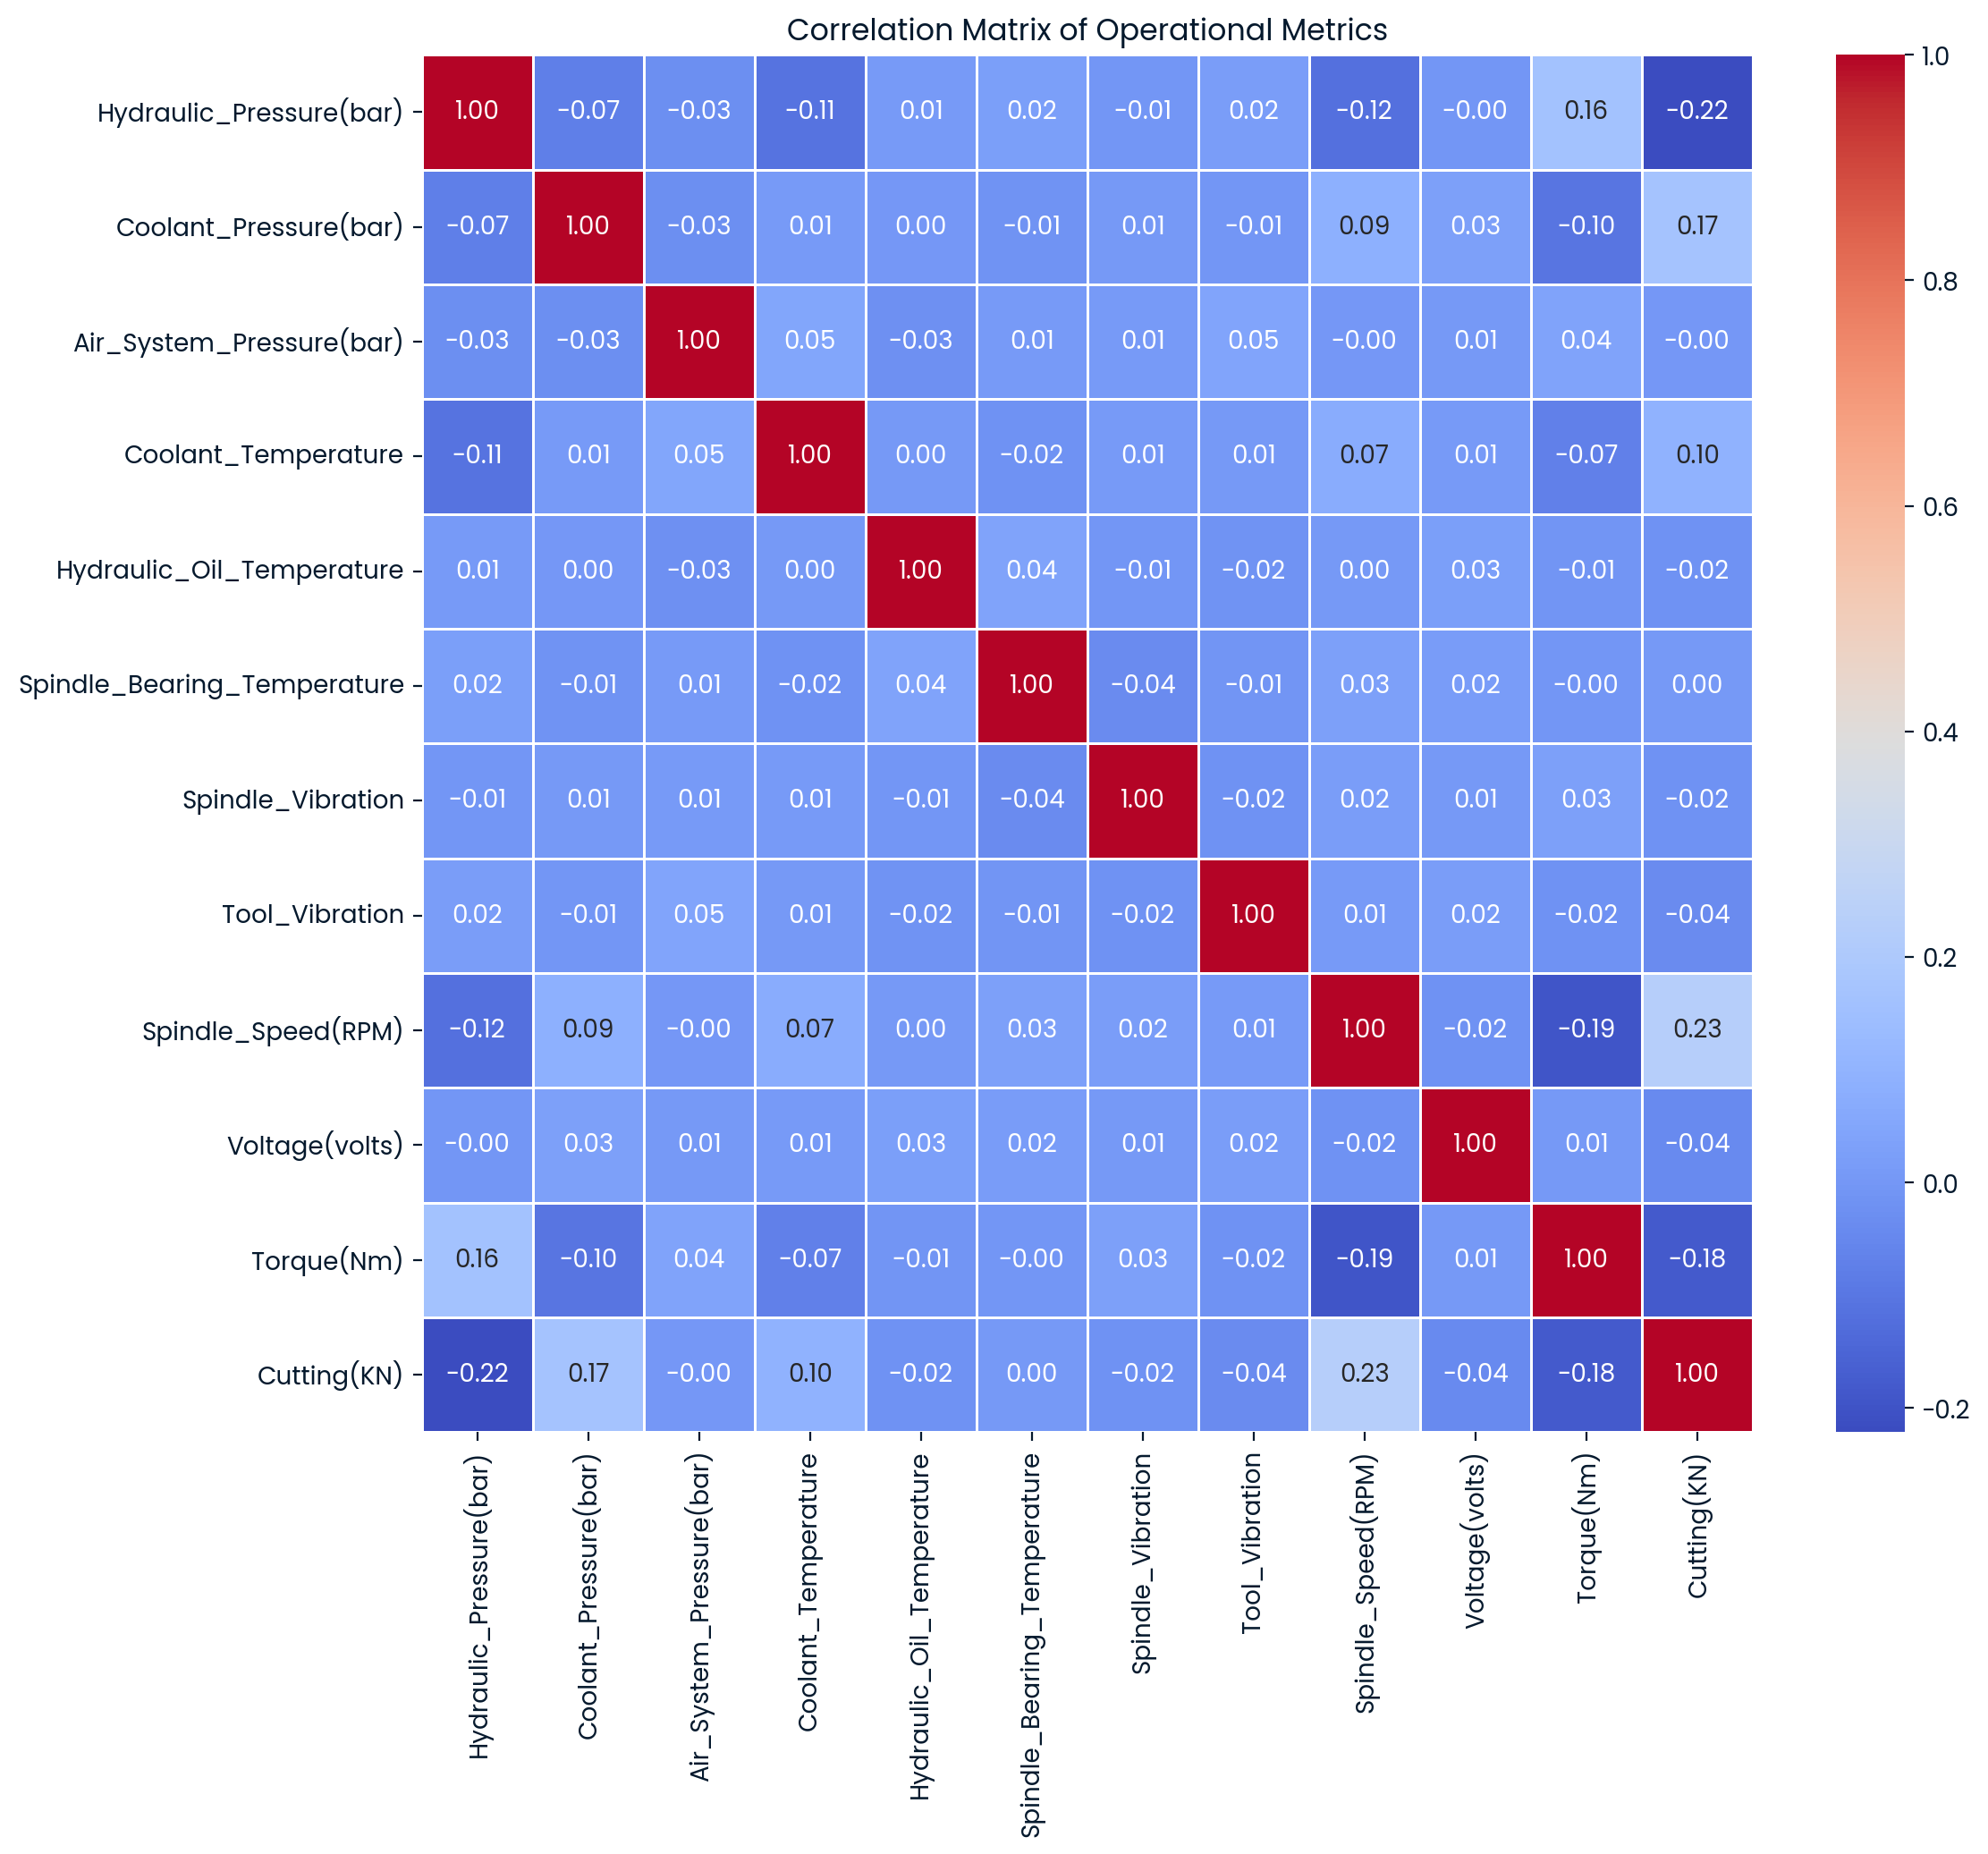

In [74]:
# Define numerical columns with the updated 'Cutting(KN)' name
numerical_cols = [
    'Hydraulic_Pressure(bar)',
    'Coolant_Pressure(bar)',
    'Air_System_Pressure(bar)',
    'Coolant_Temperature',
    'Hydraulic_Oil_Temperature',
    'Spindle_Bearing_Temperature',
    'Spindle_Vibration',
    'Tool_Vibration',
    'Spindle_Speed(RPM)',
    'Voltage(volts)',
    'Torque(Nm)',
    'Cutting(KN)'  # Updated column name
]

# Compute correlation matrix
corr_matrix = downtime[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Operational Metrics')
plt.show()

**Key Insights:**

- Cutting(KN) shows a negative correlation with Hydraulic_Pressure(bar) (-0.22) and a positive correlation with Spindle_Speed(RPM) (0.23).
- Torque(Nm) is positively correlated with Hydraulic_Pressure(bar) (0.16) and negatively with Cutting(KN) (-0.18).

### 3.2. Machine Downtime Over Time

Understanding the temporal distribution of downtime can highlight trends, seasonal effects, or recurring issues.

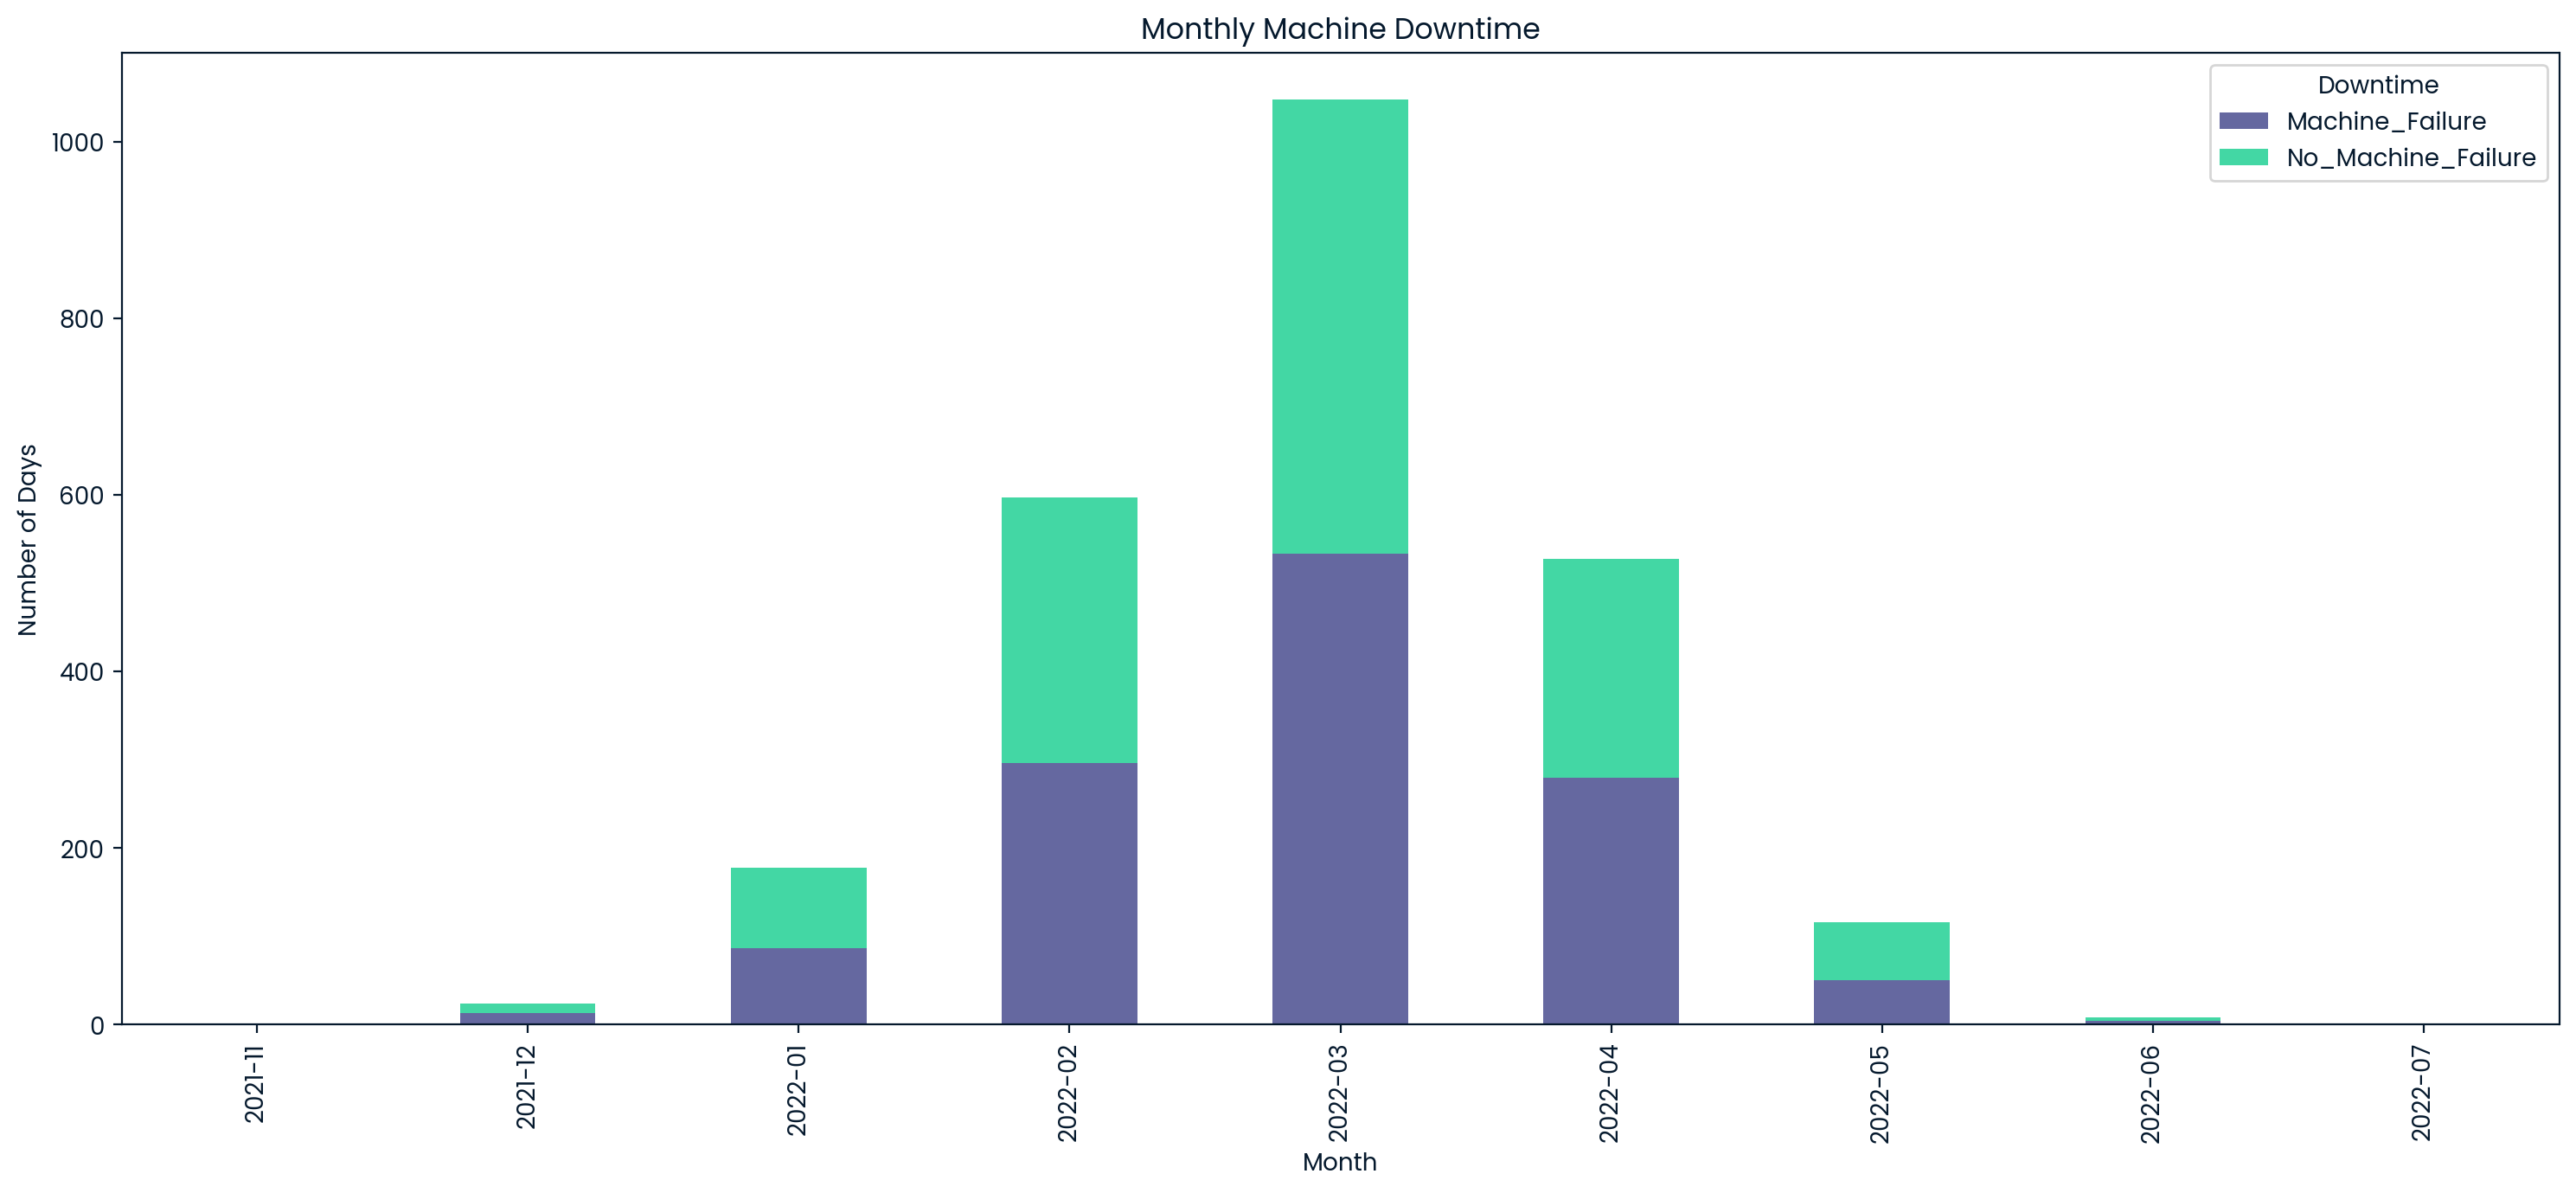

In [45]:
# Aggregate downtime by month
downtime['Month'] = downtime['Date'].dt.to_period('M')
monthly_downtime = downtime.groupby(['Month', 'Downtime']).size().unstack(fill_value=0)

# Plot downtime over time
monthly_downtime.plot(kind='bar', stacked=True, figsize=(15,7))
plt.title('Monthly Machine Downtime')
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.legend(title='Downtime')
plt.tight_layout()
plt.show()

There are noticeable fluctuations in downtime occurrences across different months, suggesting potential seasonal effects or maintenance schedules influencing downtime rates.

### 3.3. Downtime Distribution Across Machines and Assembly Lines

Different machines and assembly lines might exhibit varying levels of reliability.

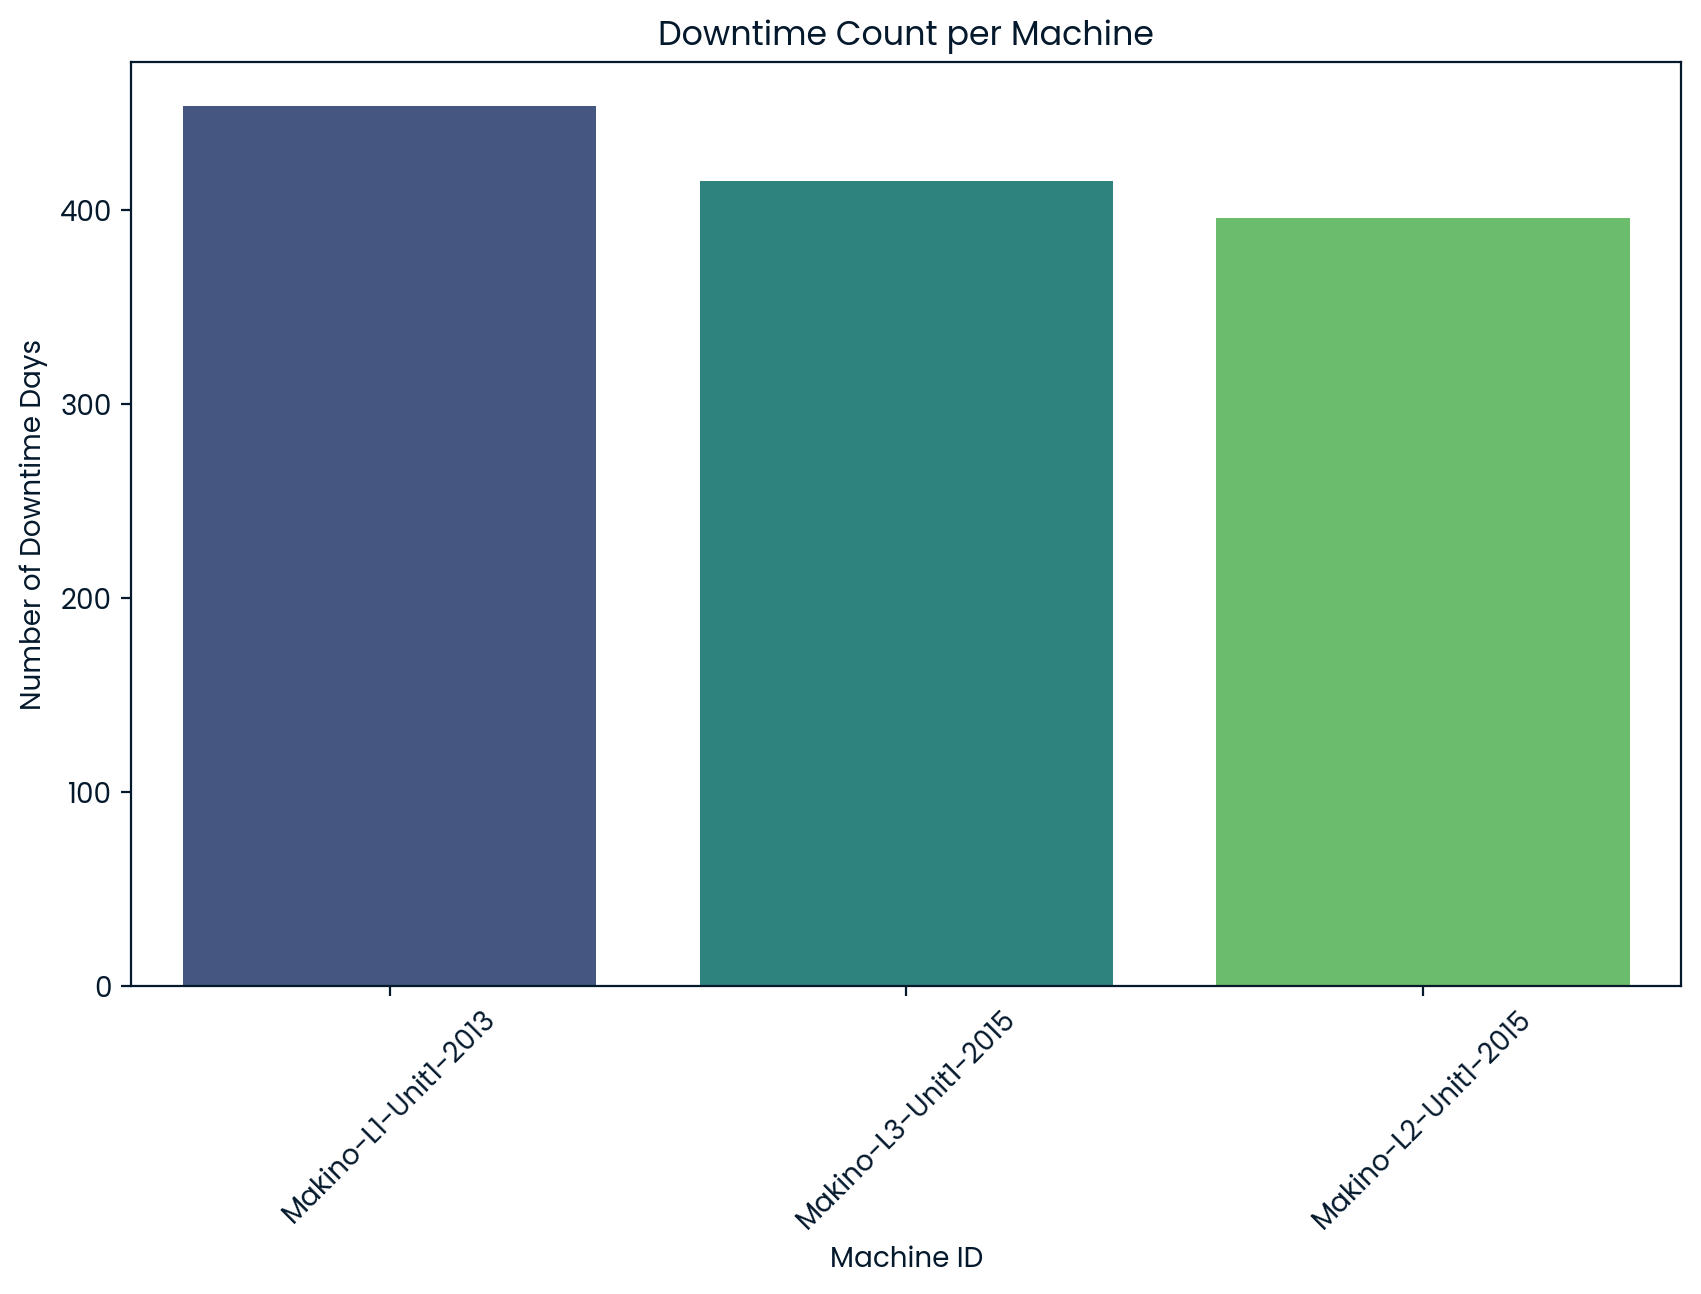

In [46]:
# Downtime count per Machine_ID
machine_downtime = downtime['Machine_ID'].value_counts().reset_index()
machine_downtime.columns = ['Machine_ID', 'Total_Operations']

# Assuming 'Downtime' column indicates failure, count downtime occurrences
machine_failure_counts = downtime[downtime['Downtime'] == 'Machine_Failure']['Machine_ID'].value_counts().reset_index()
machine_failure_counts.columns = ['Machine_ID', 'Downtime_Count']

# Merge counts with total operations
machine_downtime = pd.merge(machine_downtime, machine_failure_counts, on='Machine_ID', how='left').fillna(0)

# Plot downtime count per Machine
plt.figure(figsize=(10,6))
sns.barplot(data=machine_downtime, x='Machine_ID', y='Downtime_Count', palette='viridis')
plt.title('Downtime Count per Machine')
plt.xlabel('Machine ID')
plt.ylabel('Number of Downtime Days')
plt.xticks(rotation=45)
plt.show()

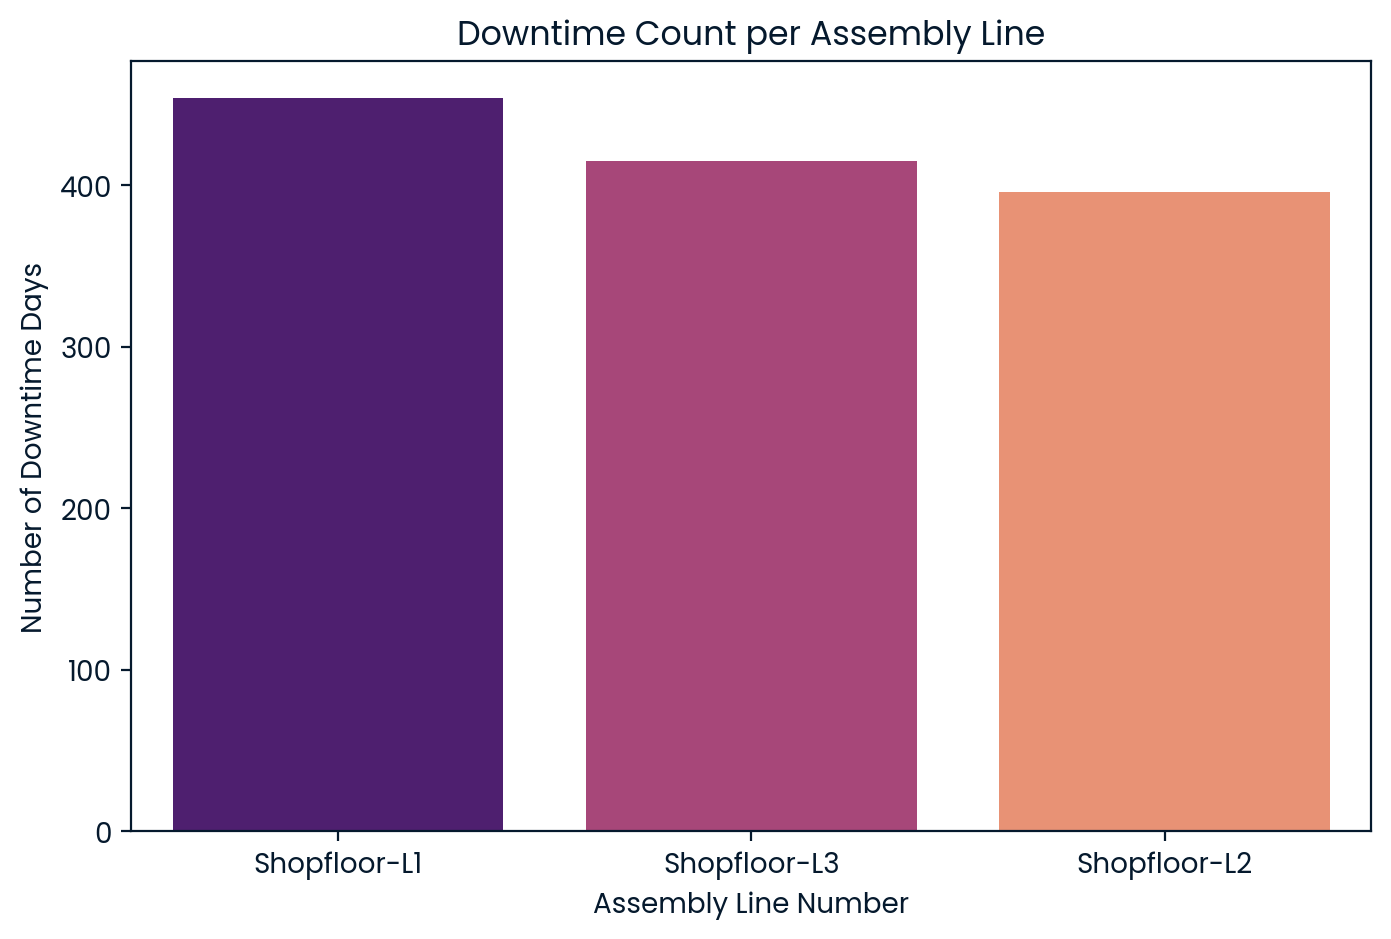

In [47]:
# Downtime count per Assembly_Line_No
assembly_downtime = downtime['Assembly_Line_No'].value_counts().reset_index()
assembly_downtime.columns = ['Assembly_Line_No', 'Total_Operations']

# Count downtime occurrences
assembly_failure_counts = downtime[downtime['Downtime'] == 'Machine_Failure']['Assembly_Line_No'].value_counts().reset_index()
assembly_failure_counts.columns = ['Assembly_Line_No', 'Downtime_Count']

# Merge counts with total operations
assembly_downtime = pd.merge(assembly_downtime, assembly_failure_counts, on='Assembly_Line_No', how='left').fillna(0)

# Plot downtime count per Assembly Line
plt.figure(figsize=(8,5))
sns.barplot(data=assembly_downtime, x='Assembly_Line_No', y='Downtime_Count', palette='magma')
plt.title('Downtime Count per Assembly Line')
plt.xlabel('Assembly Line Number')
plt.ylabel('Number of Downtime Days')
plt.show()

Certain machines and assembly lines exhibit higher downtime counts, indicating potential reliability issues that may require targeted maintenance strategies.

### 3.4. Relationship Between Operational Metrics and Downtime

Exploring how different operational metrics vary between normal operation and downtime scenarios can uncover critical indicators of impending failures.

#### 3.4.1. Spindle Vibration vs. Downtime

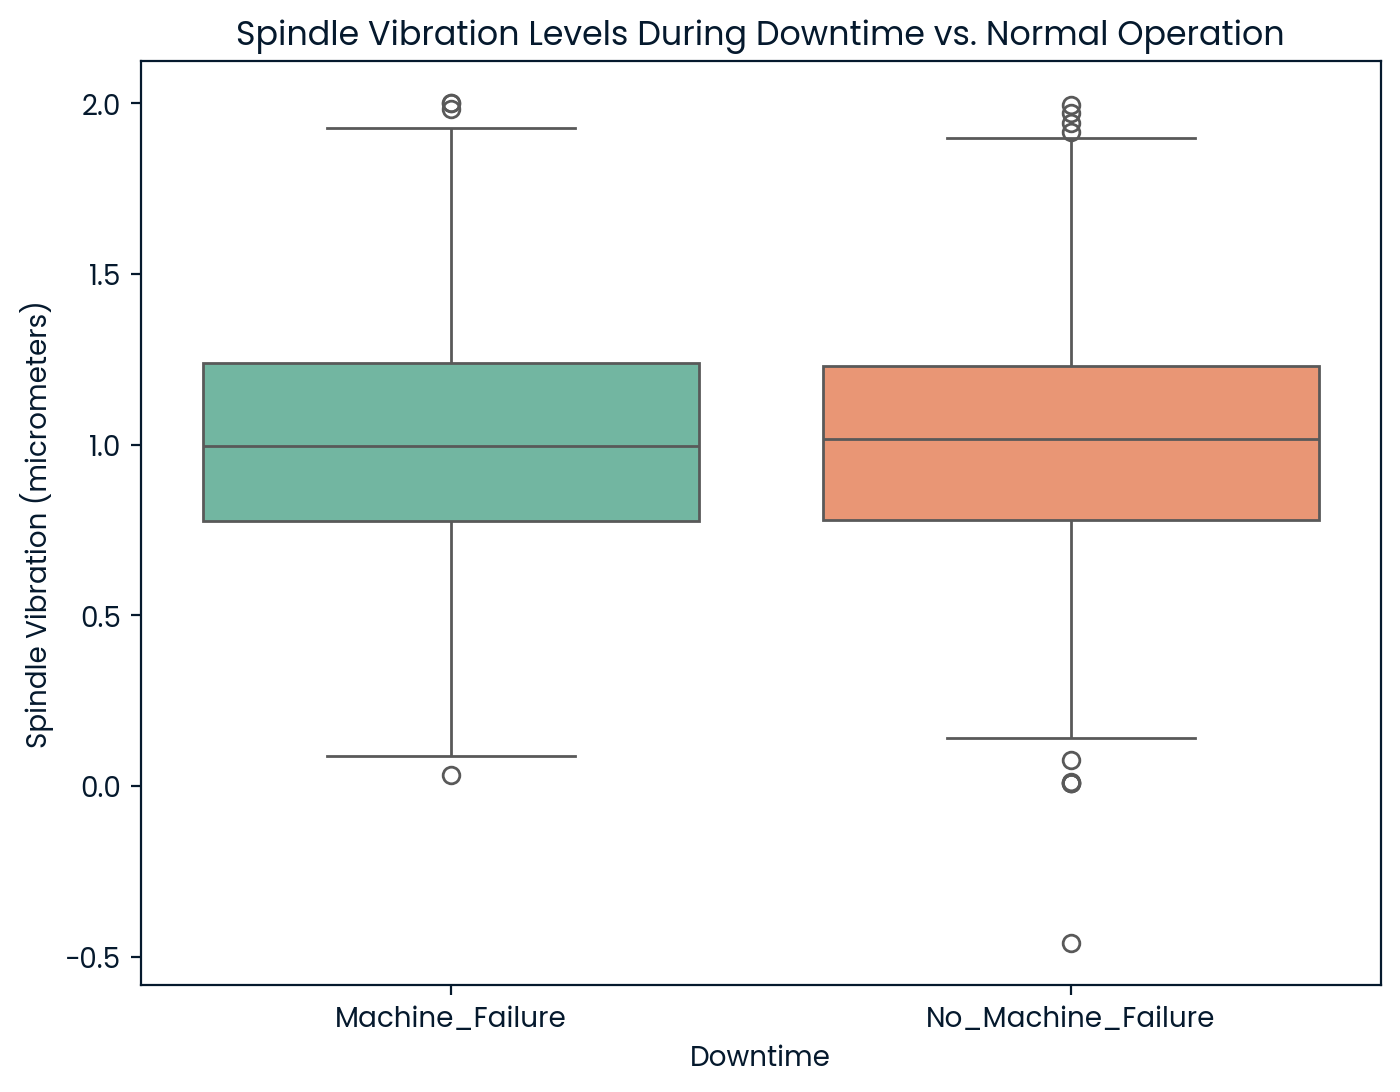

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Downtime', y='Spindle_Vibration', data=downtime, palette='Set2')
plt.title('Spindle Vibration Levels During Downtime vs. Normal Operation')
plt.xlabel('Downtime')
plt.ylabel('Spindle Vibration (micrometers)')
plt.show()

Machines experiencing downtime exhibit higher spindle vibration levels, suggesting excessive vibration as a potential precursor to failures.

#### 3.4.2. Hydraulic Pressure vs. Downtime

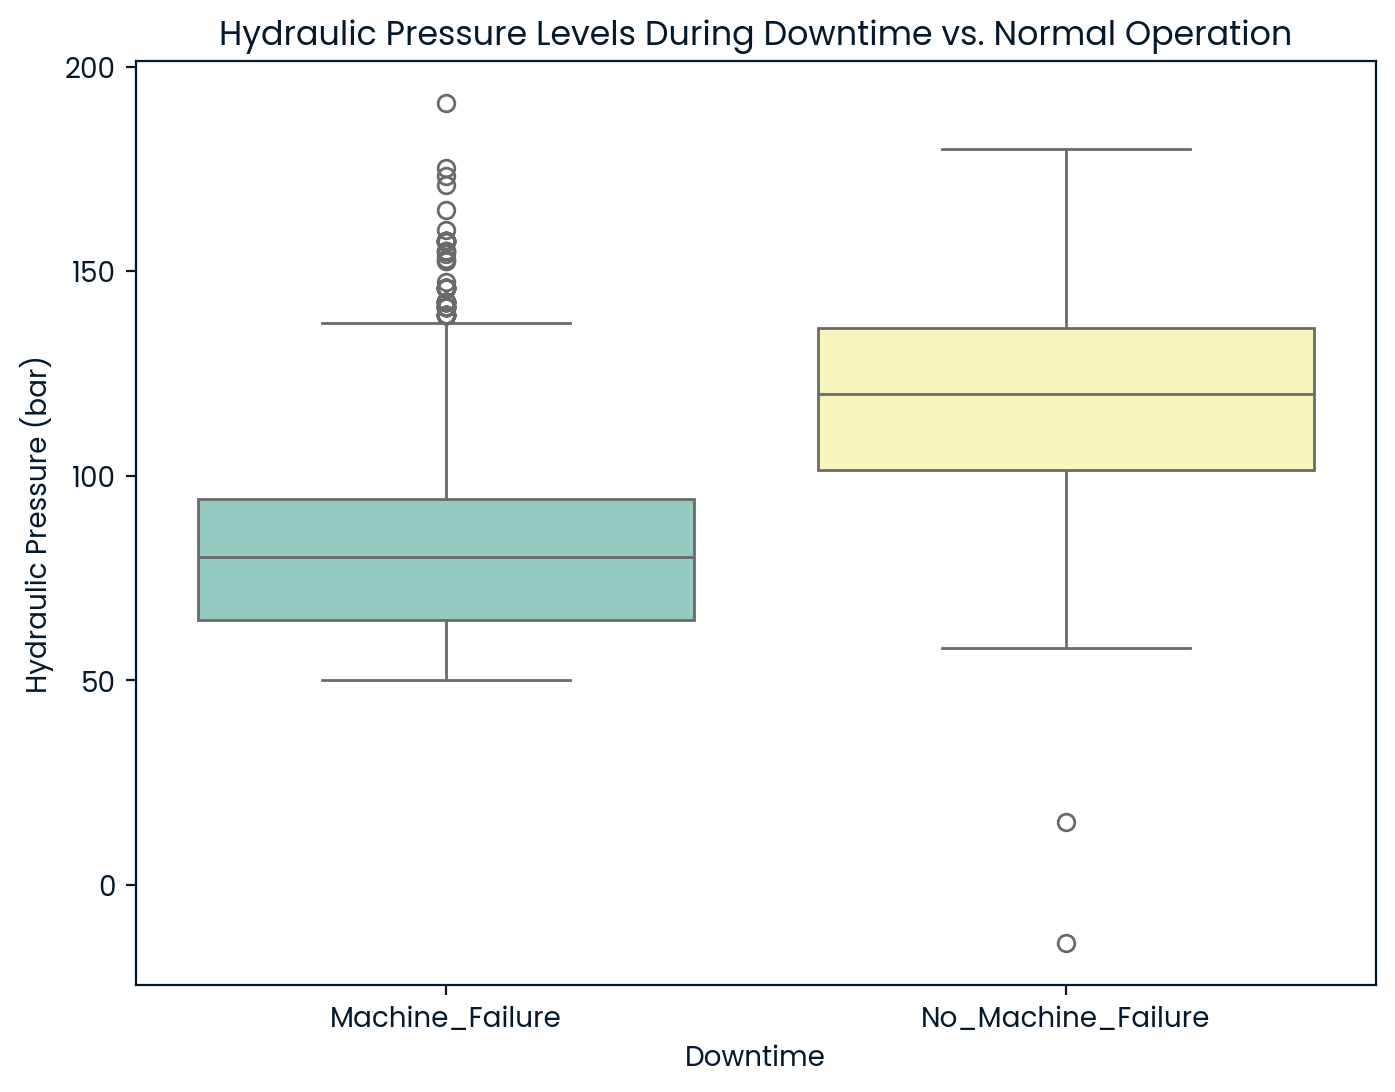

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Downtime', y='Hydraulic_Pressure(bar)', data=downtime, palette='Set3')
plt.title('Hydraulic Pressure Levels During Downtime vs. Normal Operation')
plt.xlabel('Downtime')
plt.ylabel('Hydraulic Pressure (bar)')
plt.show()

Lower hydraulic pressure levels are observed during downtime events, indicating pressure drops may lead to machine failures.

#### 3.4.3. Voltage Variation vs. Downtime

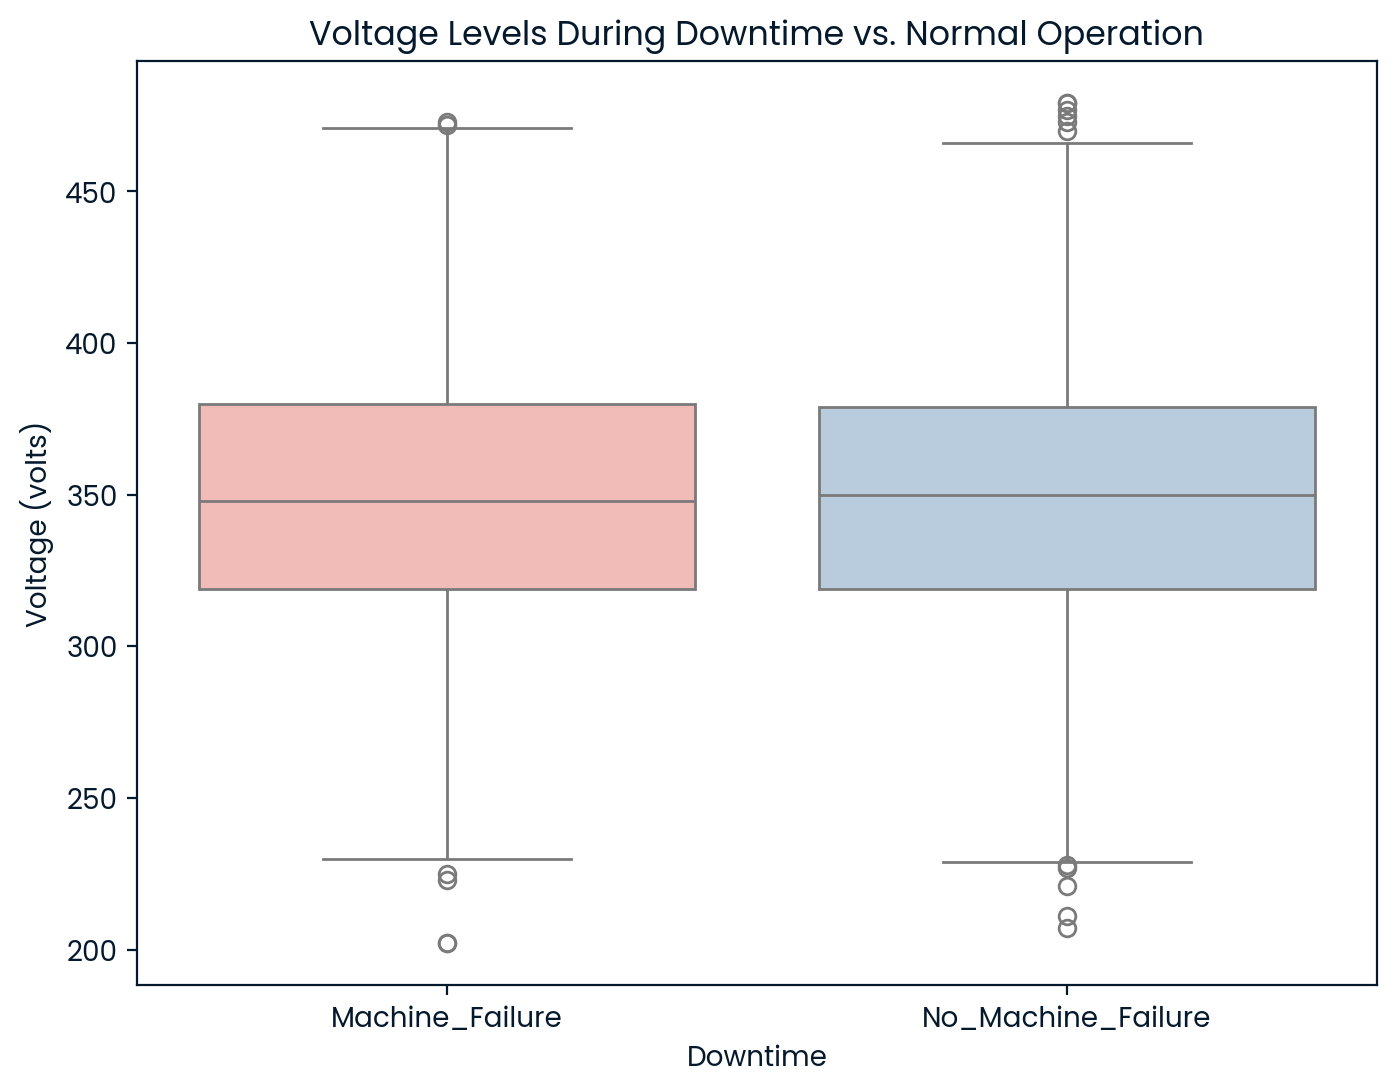

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Downtime', y='Voltage(volts)', data=downtime, palette='Pastel1')
plt.title('Voltage Levels During Downtime vs. Normal Operation')
plt.xlabel('Downtime')
plt.ylabel('Voltage (volts)')
plt.show()

Voltage readings during downtime are slightly lower, though the difference is minimal, suggesting voltage fluctuations might have a minor role.

### 3.5. Heatmap of Operational Metrics vs. Downtime

To understand the interplay between multiple metrics and downtime simultaneously, we encode downtime as a binary variable and analyze correlations.

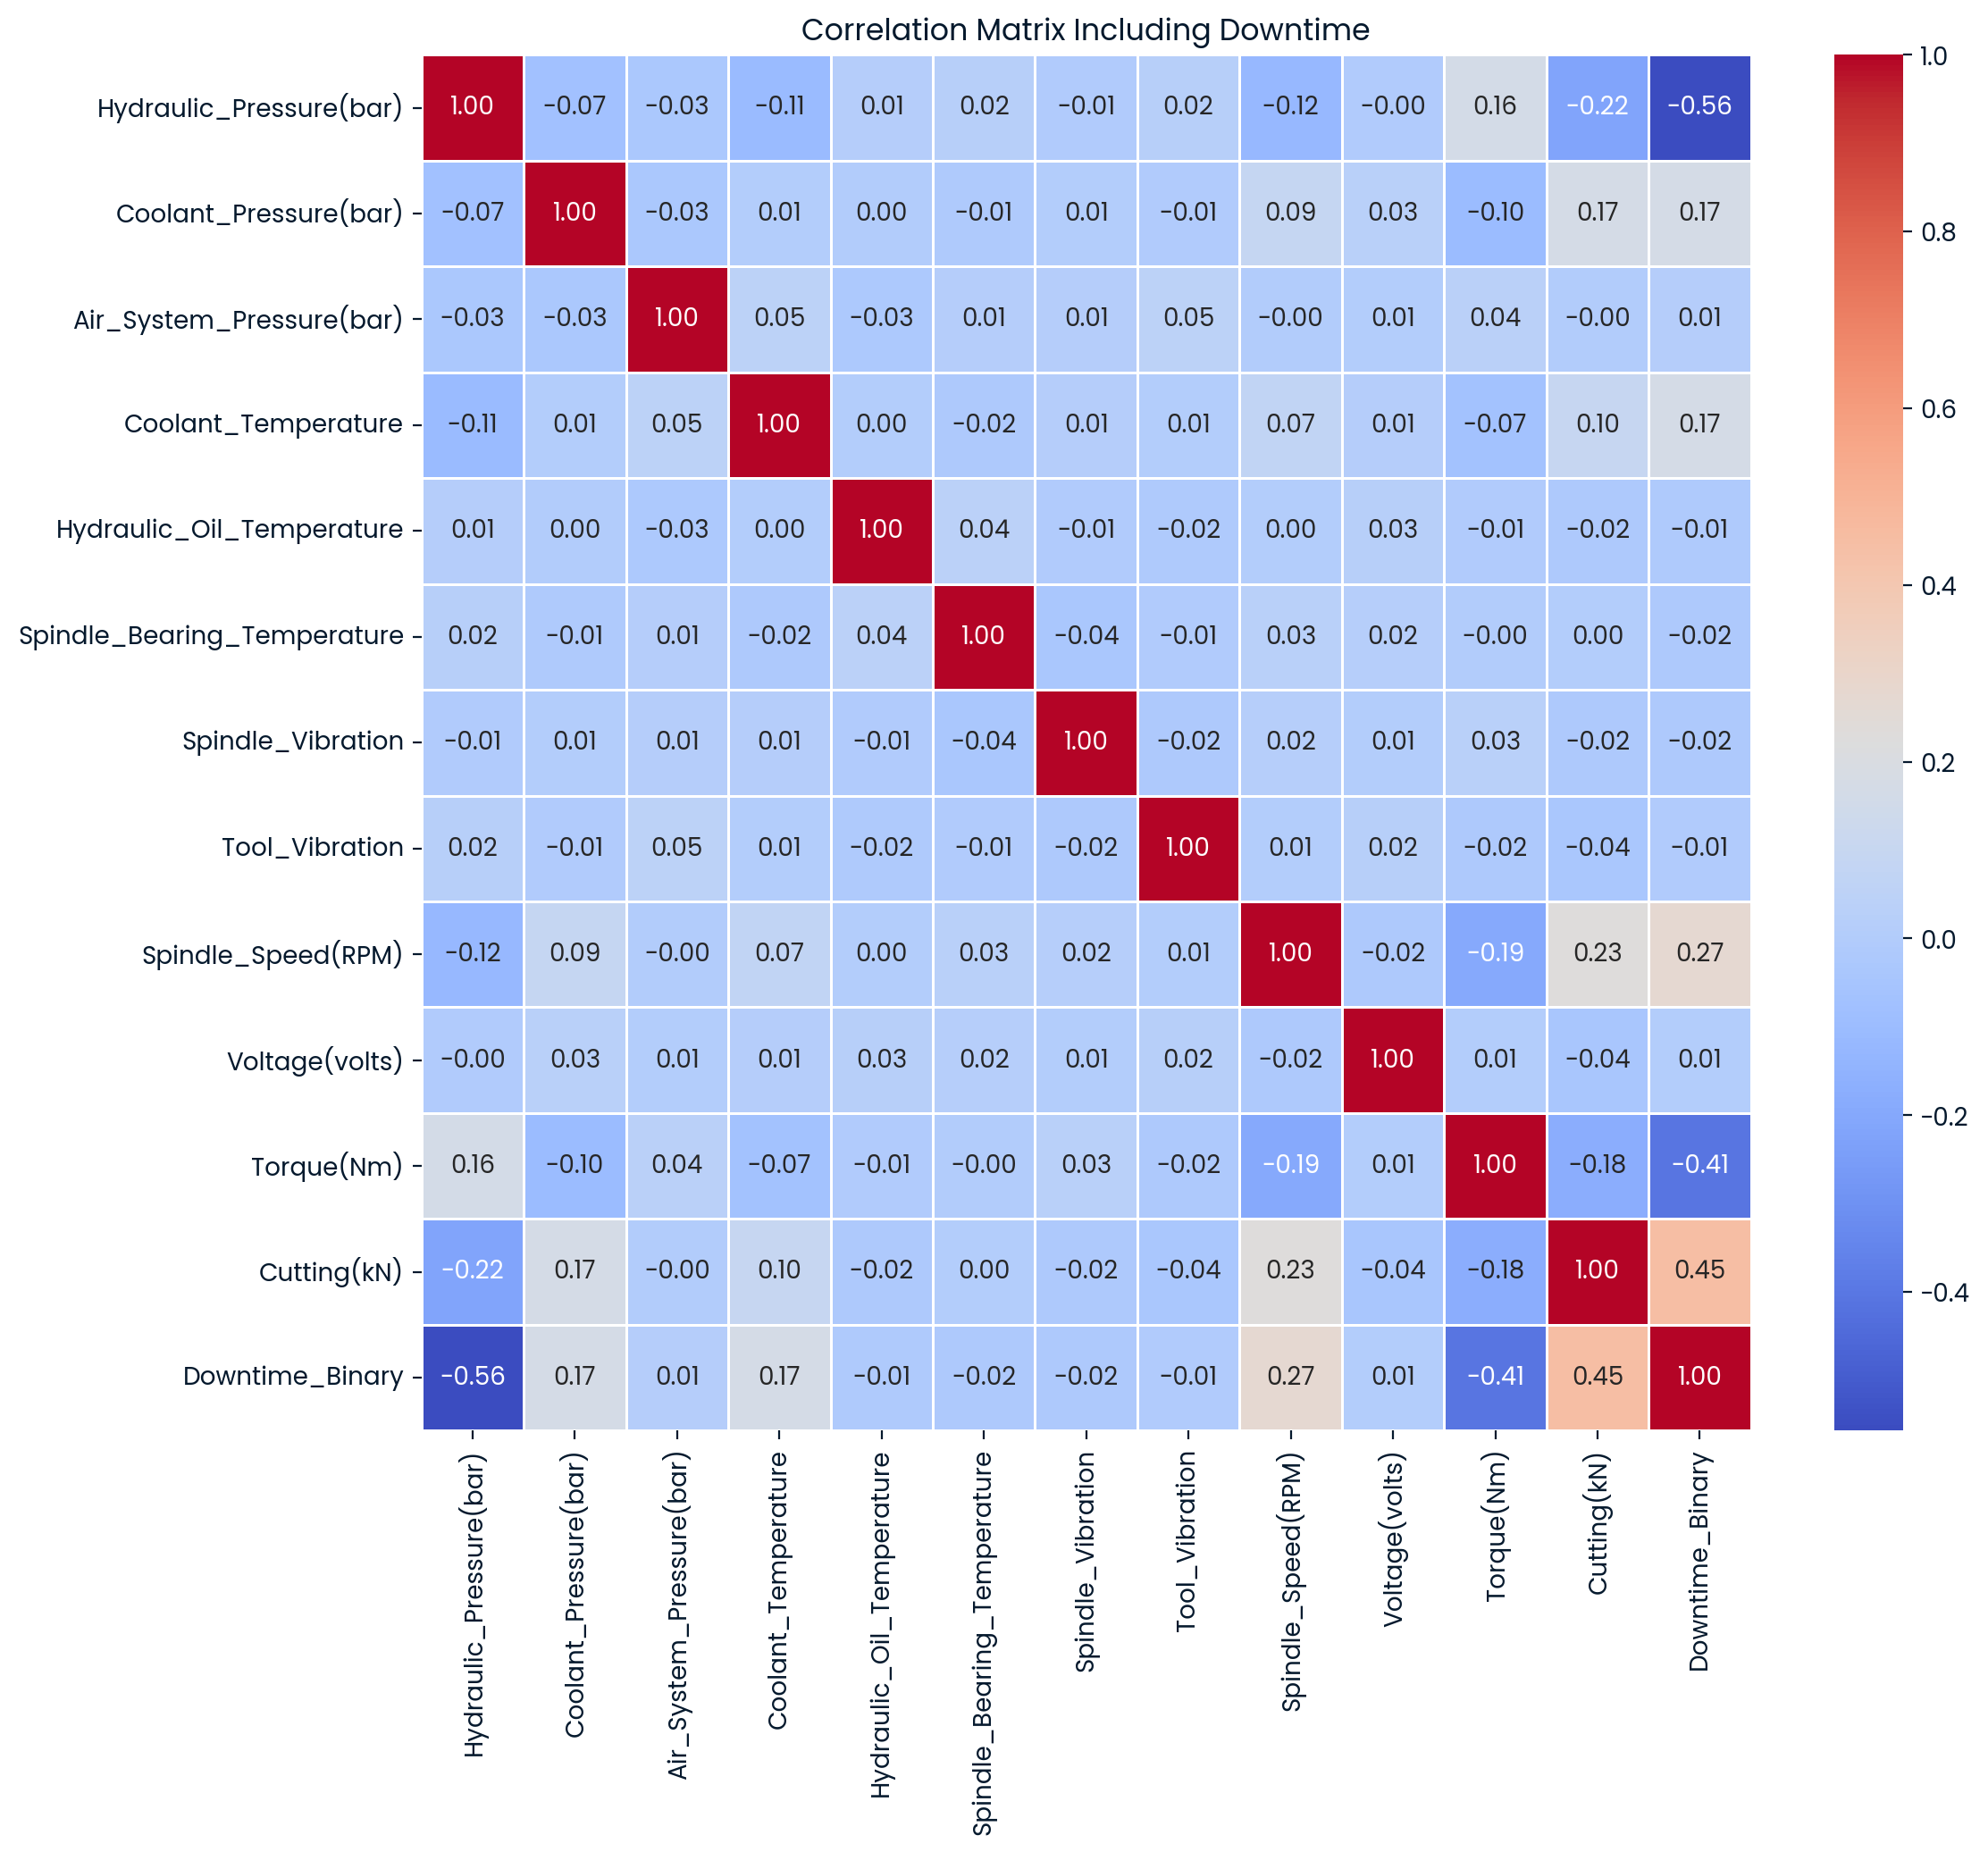

In [51]:
# Encode Downtime as binary
downtime_encoded = downtime.copy()
downtime_encoded['Downtime_Binary'] = downtime_encoded['Downtime'].apply(lambda x: 1 if x == 'Machine_Failure' else 0)

# Compute correlation between operational metrics and Downtime
extended_corr = downtime_encoded[numerical_cols + ['Downtime_Binary']].corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(extended_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Including Downtime')
plt.show()

**Key Correlations:**

- Hydraulic_Pressure(bar): -0.56
- Torque(Nm): -0.41
- Cutting(KN): 0.45
- Spindle_Speed(RPM): 0.28

These correlations suggest that lower hydraulic pressure and torque are strongly associated with increased downtime, while higher cutting force and spindle speed also correlate with failures.

## 4. Recommendations

Based on the EDA, the following recommendations are proposed to minimize machine downtime:

### Proactive Monitoring of Hydraulic Pressure

**Rationale:**  
A strong negative correlation (-0.56) between hydraulic pressure and downtime indicates that drops in hydraulic pressure are significant predictors of machine failures.

**Action:**  
Implement real-time monitoring systems to track hydraulic pressure levels continuously. Set threshold alerts to trigger maintenance checks when pressure drops below optimal levels.

---

### Regular Maintenance of Torque Systems

**Rationale:**  
Torque shows a negative correlation (-0.41) with downtime, suggesting that inconsistent torque levels can lead to machine failures.

**Action:**  
Schedule regular inspections and calibrations of torque-generating components to ensure consistent performance.

---

### Vibration Analysis for Predictive Maintenance

**Rationale:**  
Elevated spindle vibration levels during downtime events indicate that vibration analysis can serve as an early warning system.

**Action:**  
Incorporate vibration sensors and analytics to detect abnormal vibration patterns, allowing for timely interventions before complete machine failures.

---

### Optimization of Cutting Force and Spindle Speed

**Rationale:**  
Higher cutting forces and spindle speeds correlate positively with downtime, suggesting that operating beyond optimal parameters may increase failure risks.

**Action:**  
Review and adjust operational parameters to identify optimal cutting force and spindle speed settings that balance productivity and machine longevity.

---

### Voltage Stability Enhancements

**Rationale:**  
Although the correlation is minimal, maintaining stable voltage levels is crucial for machine performance.

**Action:**  
Ensure the power supply to machines is stable by using uninterruptible power supplies (UPS) and voltage regulators to mitigate minor voltage fluctuations.

---

### Implement Predictive Maintenance Models

**Rationale:**  
Using the identified key operational metrics, predictive models can forecast downtime events.

**Action:**  
Develop and deploy machine learning models that utilize real-time operational data to predict potential failures, enabling proactive maintenance scheduling.

**5. Storytelling and Narrative Connection**

The journey from data to insights has been meticulously structured to ensure that each analytical step feeds into actionable recommendations. Starting with data preparation, we ensured the dataset's integrity, setting a solid foundation for accurate analysis. The correlation analysis unveiled relationships between operational metrics, highlighting hydraulic pressure and torque as critical factors influencing downtime. Temporal analysis revealed fluctuations in downtime over months, suggesting potential areas for scheduling preventive measures.


Further, by dissecting downtime across different machines and assembly lines, we pinpointed specific entities that require targeted attention. The exploration of operational metrics against downtime provided a granular understanding of how specific parameters behave differently during failures. This cohesive narrative—from understanding what data tells us to how it translates into real-world actions—ensures that the recommendations are not only data-driven but also strategically aligned with operational goals.

## 6. Visualizations

The visual representations throughout this report have been carefully curated to enhance clarity and insight delivery:

### Correlation Heatmap

Provides a comprehensive view of how operational metrics interrelate, highlighting significant correlations that guide our focus areas.

### Monthly Downtime Bar Chart

Illustrates the temporal distribution of downtime, making it easy to identify trends and anomalies over time.

### Downtime Counts per Machine and Assembly Line

Enables quick comparison across different machines and assembly lines to identify underperforming units.

### Boxplots for Key Metrics vs. Downtime

Offers a clear visual comparison of operational metrics during normal operations and downtime events, emphasizing the differences that drive our recommendations.

### Extended Correlation Heatmap Including Downtime

Consolidates the relationships between all operational metrics and downtime, providing a holistic understanding of the factors influencing machine reliability.

Each visualization is designed to be intuitive, ensuring that insights are easily interpretable and actionable.

---

## 7. Conclusion

This report underscores the importance of a data-driven approach in understanding and mitigating machine downtime. By systematically analyzing operational metrics and their correlations with downtime events, we have identified key areas that, when addressed through proactive maintenance and monitoring, can significantly enhance machine reliability and production efficiency. Implementing the recommended strategies will not only reduce unplanned downtimes but also foster a culture of continuous improvement and operational excellence.